<a href="https://colab.research.google.com/github/larissazhu123/ERSP_Counting_Things/blob/master/counting_with_simple_monte_carlo_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
from random import choices
import matplotlib.pyplot as plt
from scipy.ndimage import label
from scipy.ndimage.morphology import binary_dilation, generate_binary_structure
import csv

## Count estimation if objects in an image with Monte Carlo integration

In this tutorial we will count number of small squares in a large image using statistical estimation

Making Data Structure using strawberries.csv

In [31]:

### Read from CSV and extract into a data structure 
data_struct = []
with open('./strawberries.csv', 'r',) as csv_file:
    csv_reader = csv.DictReader(csv_file)
   # next(csv_reader)  # Skip the header row
    for row in csv_reader:
        fileName= row['image_id']
        approximate_count = float(row['approximate_count'])
        trueCount = float(row['true_count'])

        data_row = ({
            'fileName': fileName,
            'approxCounts': approximate_count,
            'true_count': trueCount
        })

        data_struct.append(data_row)



#approx_counts = [row['approxCounts'] for row in data_struct]
#i feel like we should round? but we don't have to
approx_counts = [round(float(row['approxCounts'])) for row in data_struct]
covariateStarberries = approx_counts
print(covariateStarberries)


[3, 7, 15, 15, 18, 5, 23, 35, 33, 128, 68, 37, 10, 79, 18, 32, 23, 13, 37, 9, 22, 14, 12, 114, 15, 21, 31, 23, 17, 14, 48, 11, 16, 16, 13, 33, 6, 5, 13, 14, 40, 18, 17, 36, 7, 78, 11, 16, 39, 7, 21, 9, 11, 20, 15, 47, 44, 5, 49, 20, 23, 13, 27, 77, 38, 44, 22, 99, 101, 19, 35, 33, 10, 108, 47, 48, 27, 12, 47, 92, 9, 49, 45, 1, 12, 74, 38, 45, 7, 13, 22, 16, 157, 81, 32, 8, 26, 13, 34, 15, 101, 80, 48, 94, 30, 22, 28, 11, 35, 63, 154, 16, 36, 39, 29, 68, 46, 44, 43, 23, 13, 21, 104, 22, 23, 18, 38, 104, 117, 34, 82, 16, 24, 71, 183, 74, 26, 21, 19, 38, 12, 204, 24, 75, 104, 66, 33, 71, 16, 6, 89, 38, 124, 75, 32, 52, 73, 31, 39, 18, 5, 43, 12, 49, 35, 76, 35, 82, 69]


In [2]:
def get_tiles_from_image(im, tile_size=50):
    tiles = []
    for i in range(0, im.shape[0], tile_size):
        for j in range(0, im.shape[1], tile_size):
            tiles.append(im[i:i+tile_size, j:j+tile_size])
    return tiles

### Create image with objects

(1000, 1000)


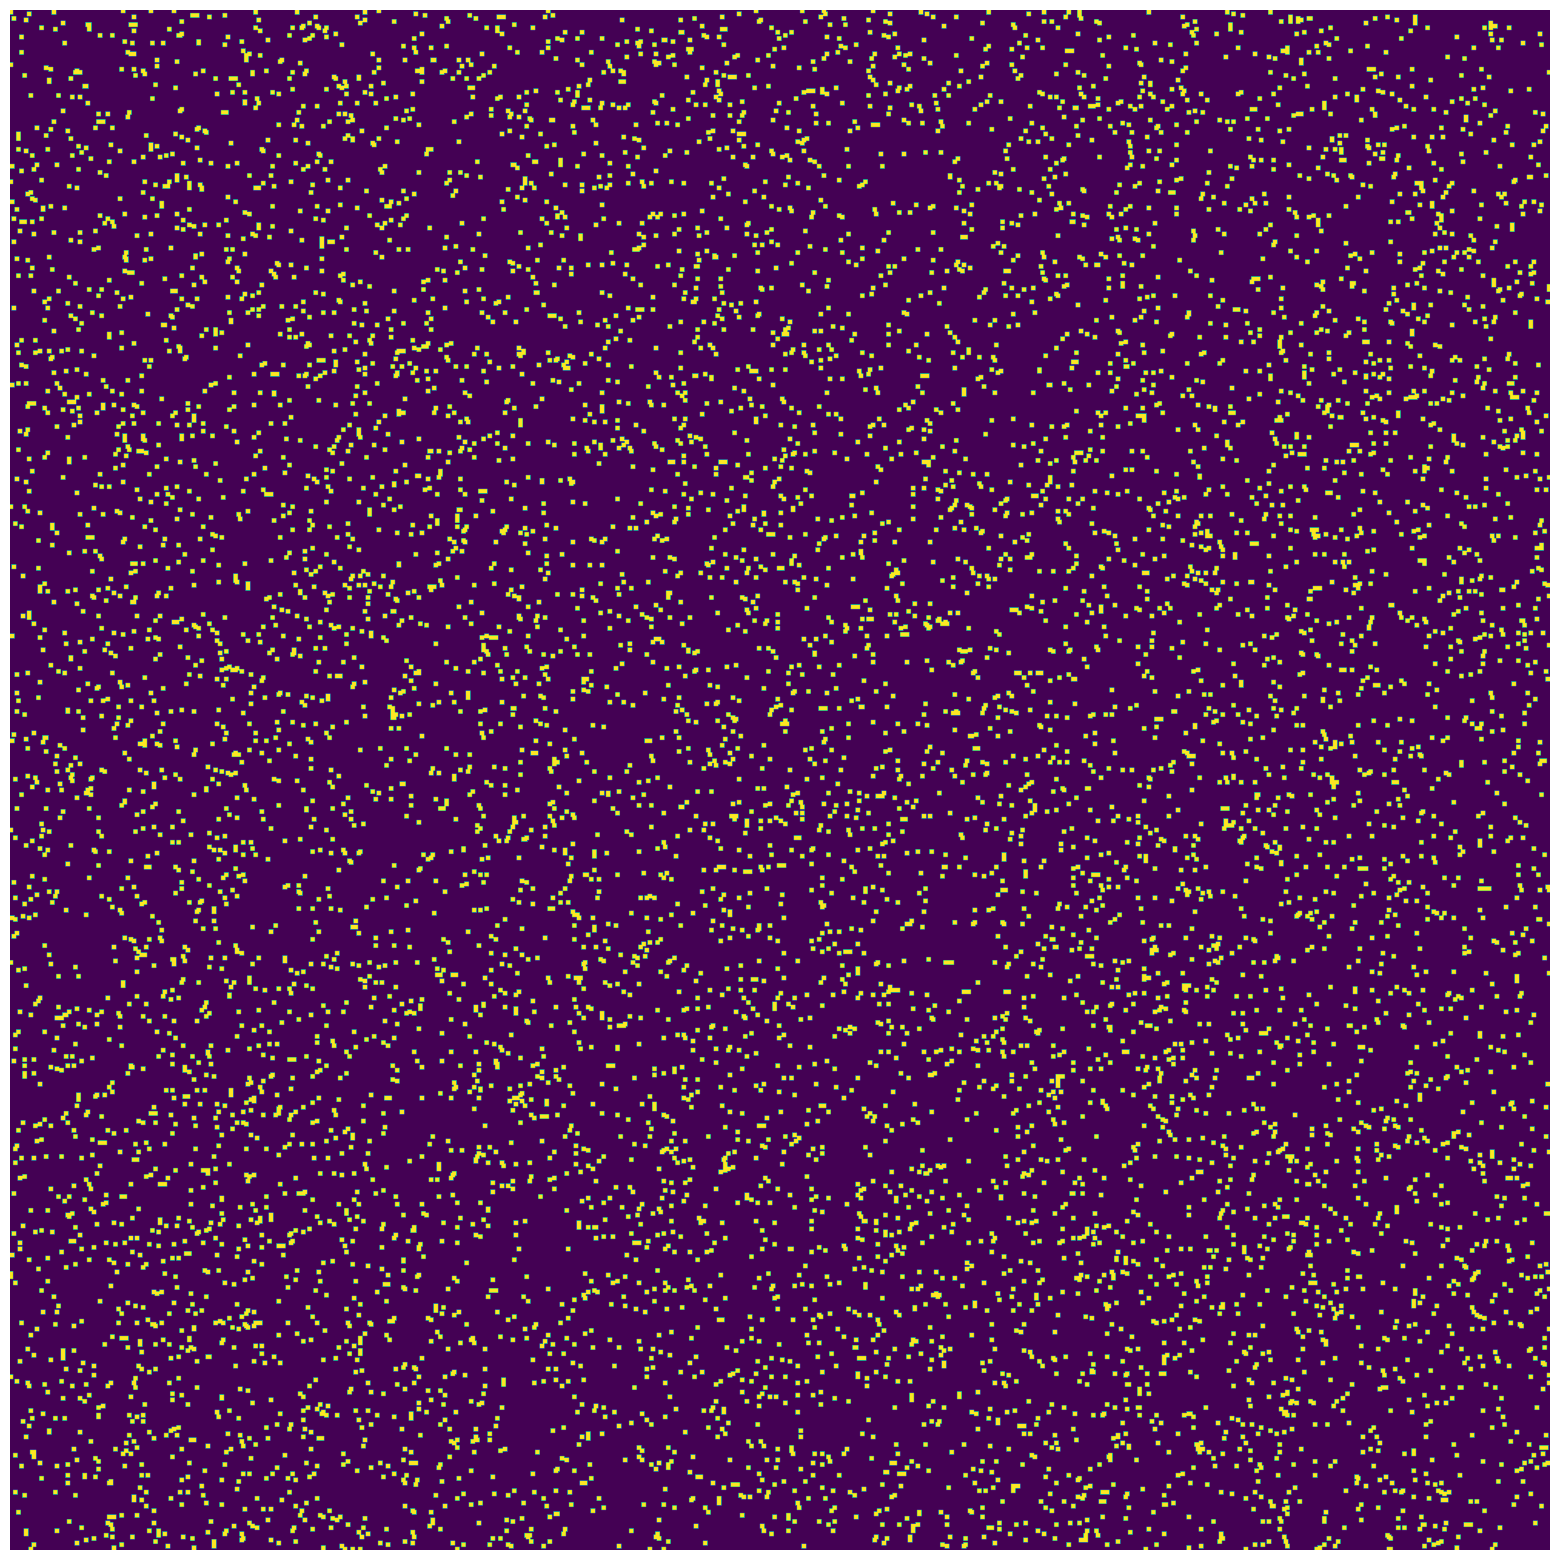

In [3]:
F = 10000 # Number of pbjects in the image (ground-truth count)
im_size = 1000 # 1000 x 1000 pixels

# Draw coordinates of each object randomly
x = (im_size*np.random.rand(F)).astype(int)
y = (im_size*np.random.rand(F)).astype(int)

# Create image and draw objects

im = np.zeros((im_size, im_size))
im[x, y] = 1
struct = generate_binary_structure(2, 2)
im = binary_dilation(im, structure=struct, iterations=1).astype(im.dtype)
print(im.shape)

# Show image
fig, ax = plt.subplots(1, 1, figsize=(20,20))
plt.imshow(im)
plt.axis('off')
plt.show()

## Simple Monte Carlo integration

Counting the number of objects in the image $S$ above is too difficult so we will estimate it using simple Monte Carlo integration by sampling a few small tiles $s$ ($50\times 50$ pixels) from the large image. First, assume that $f(s)$ is the *true* count in a single tile $s$, then the total count of objects in the complete image is

$$
F(S) = \sum_{s \in S} f(s)
$$

Instead of counting the number of objects in each tile $s$ we will estimate it with the following estimator which draws $n$ samples (tiles) uniformly from $S$

$$
\hat{F}(S) = |S| \cdot \frac{1}{n}\sum_{i=1}^n f(s_i), \qquad s_i \sim \texttt{Unif}(S).
$$

where |S| is the total number of tiles in $S$, in our case $20^2$ with tiles of size $50\times 50$. The **goal** is to calculate $\hat{F}(S)$.

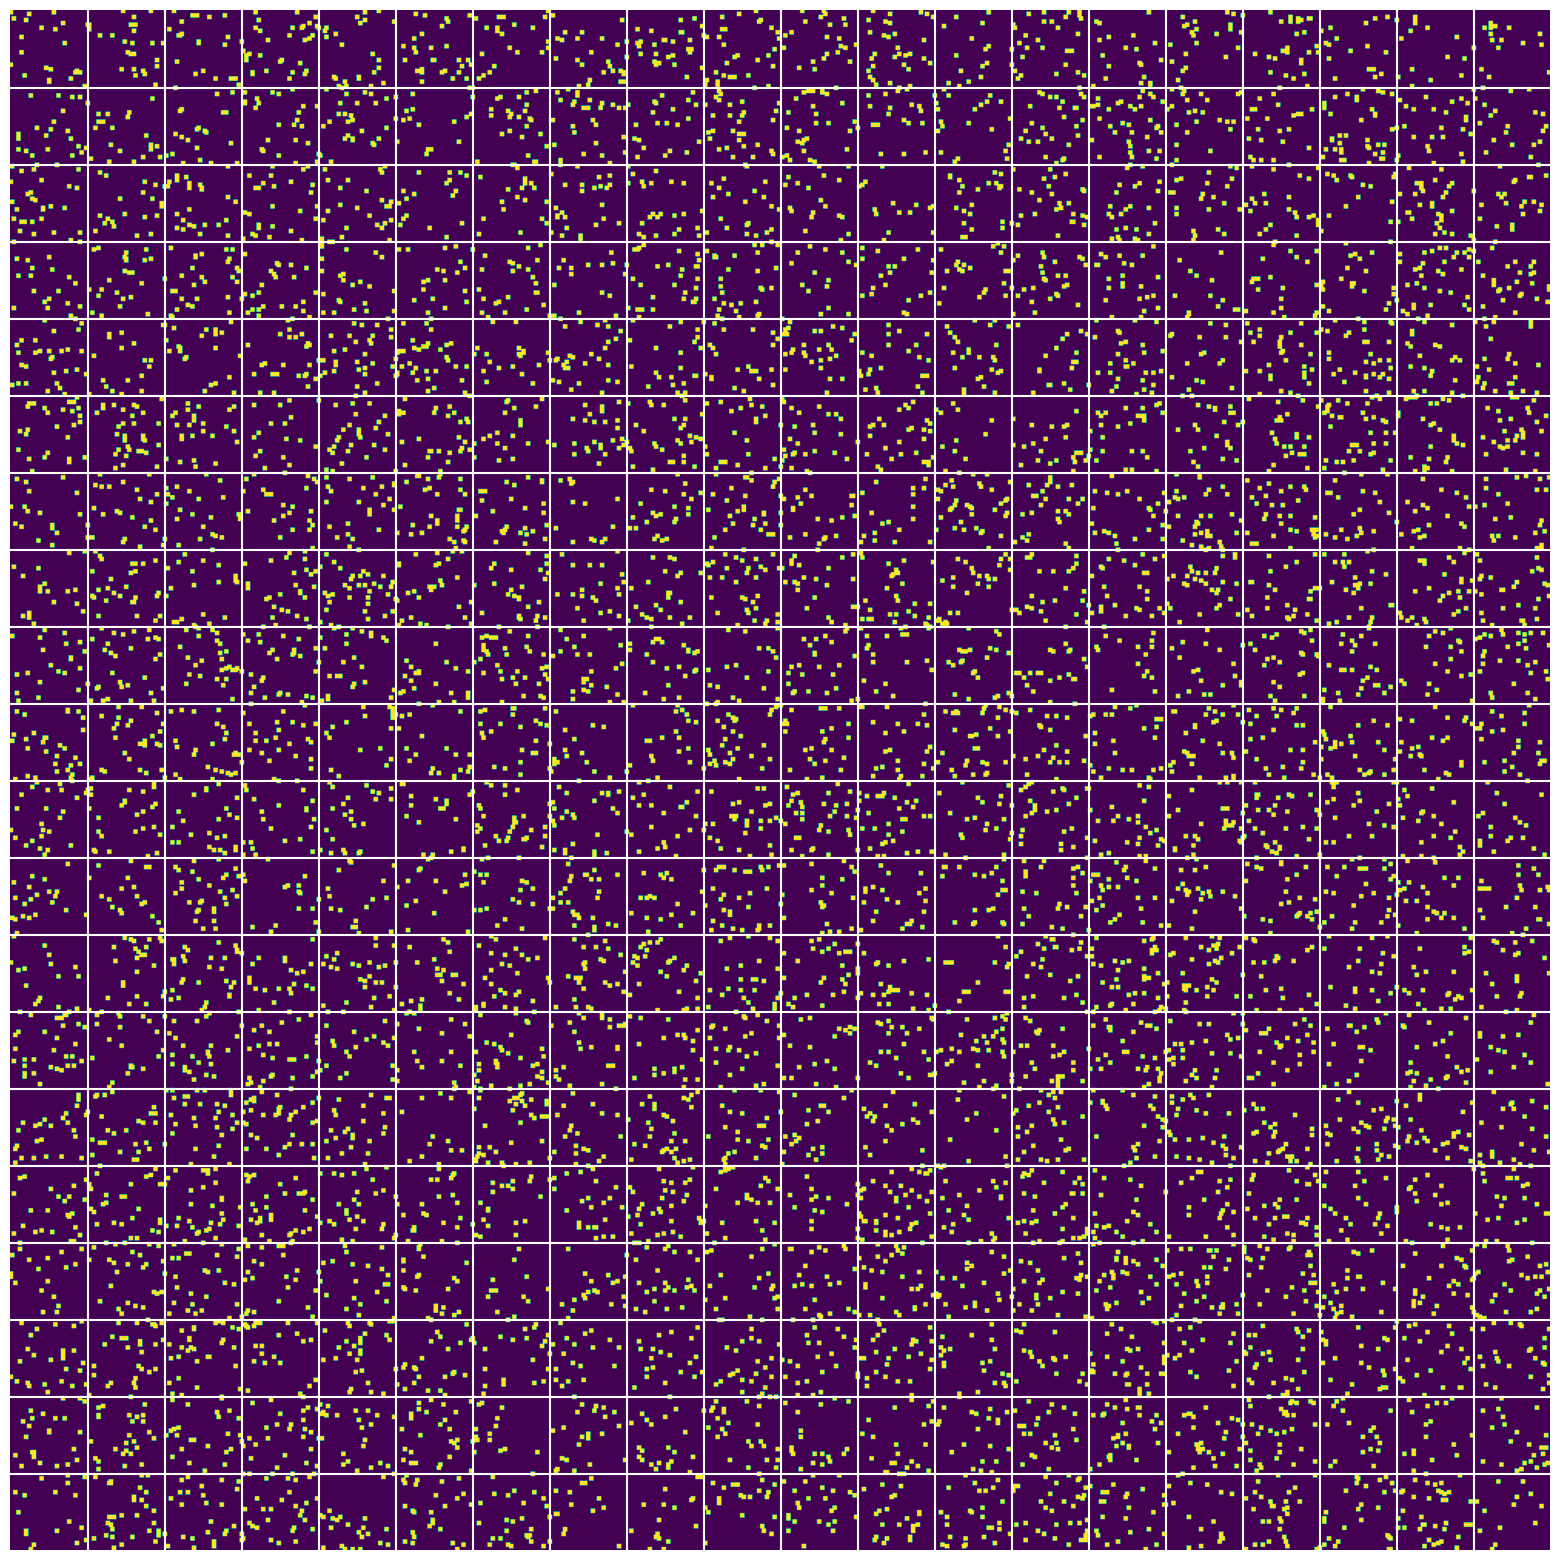

In [4]:
# Show image divided in tiles of size 50x50
N = 20**2 # total number of tiles assuming a tile size of 50x50

fig, ax = plt.subplots(1, 1, figsize=(20,20))
plt.imshow(im)
for i in range(50, 1000, 50):
    plt.axvline(x=i, color='white')
    plt.axhline(y=i, color='white')
plt.axis('off')
plt.show()

# TODO

**Task:** Assume $n=5$ tiles, **estimate the total number of objects $\hat{F}(S)$ in the complete image $S$**.

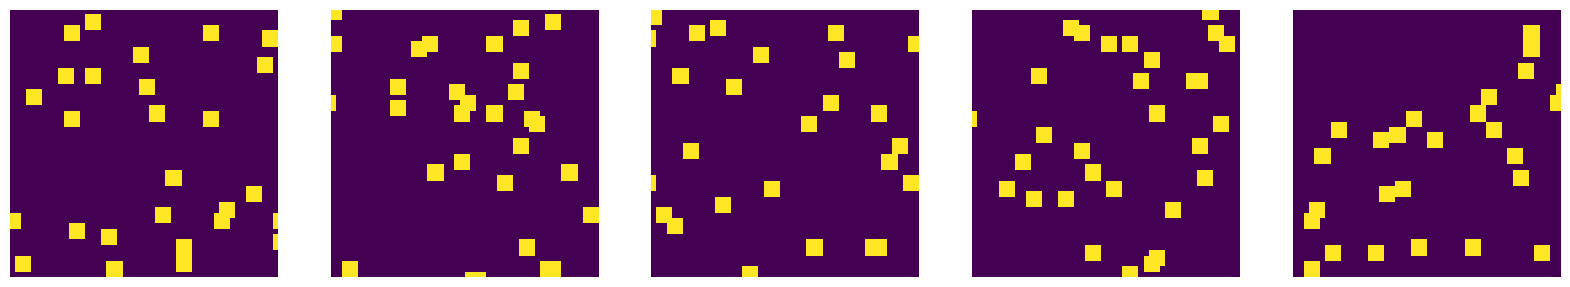

In [5]:
# Here I will give you the code to sample and show the 5 tiles.
# Every time you run it it will sample 5 new tiles.
n = 5
test = np.arange(N)

samples = choices(np.arange(N), k=n) # this will sample uniformly random n tiles with repetition

tiles = get_tiles_from_image(im, tile_size=50) # this will make easier the visualization

fig, ax = plt.subplots(1, n, figsize=(20,5*n))
for i, s_i in enumerate(samples):
    plt.subplot(1,n, i+1)
    plt.imshow(tiles[s_i])
    cur = tiles[s_i]
    #print(type(cur))
    #print(cur)
    plt.axis('off')
plt.show()

**TODO:** fill the list below with the *true* count for each tile.

In [6]:
f_s_i = [28, 24, 33, 25, 37]

**TODO:** Implement $\hat{F}(S)$ (see formula above) and estimate the total count.

In [8]:
F_hat = N*np.mean(f_s_i) # See Equation for \hat{F}(S) above

print('Estimated number of objects: %d (true count: %d)'%(F_hat, F))

Estimated number of objects: 11760 (true count: 10000)


## Error rate

Here we are going to calculate the error rate of your estimate:

$$
    \texttt{Error} = \frac{|F(S) - \hat{F}(S)|}{F(S)}
$$

In [9]:
# Calculate error (you should get ~5% error)
Error = np.abs(F - F_hat)/F
print('Error rate: %.2f%%'%(Error*100.))

Error rate: 17.60%


# Estimating counts with Importance Sampling

(1000, 1000)


c:\Users\lzhu2\anaconda3\envs\fscount\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: covariance is not positive-semidefinite.
  


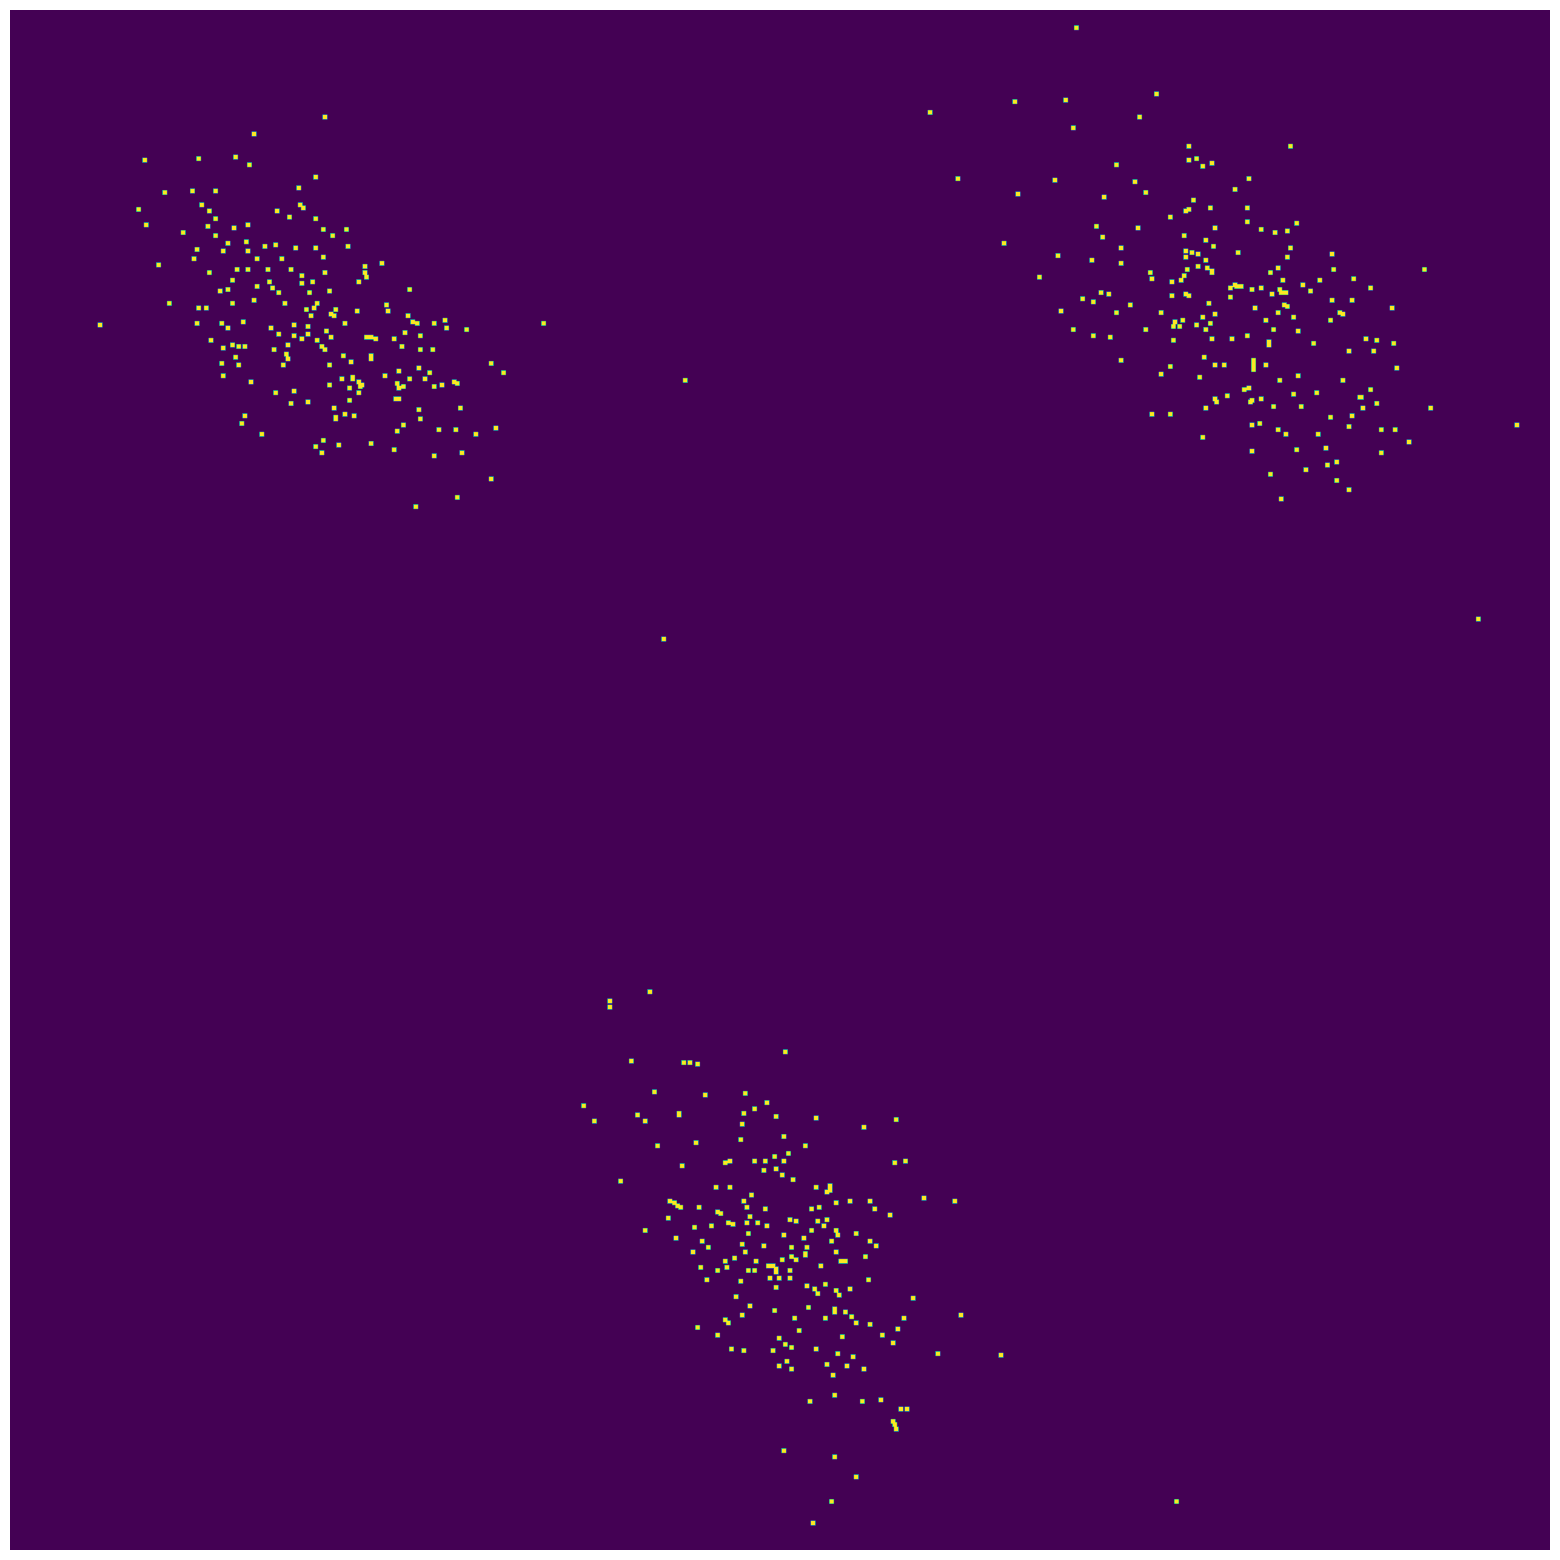

In [10]:
# Now let's assume the objects (small squares) in the large image are not distributed uniformly
# For this example I will draw objects sampling from a multivariate normal distributions (3 gaussians, specifically)

# here I define the means and covariances for each gaussian
means = [[200, 200],
         [800, 500],
         [200, 800]]
covs = [[[2000, 1000], [2000, 4000]],
        [[1000, 2000], [4000, 2000]],
        [[2000, 4000], [4000, 2000]]]

# The following is similar to what I did to create the first image, but we are not sampling uniformly at random
im = np.zeros((im_size, im_size)) # create empty image to draw objects

for mean, cov in zip(means, covs):
  xy = np.random.multivariate_normal(mean, cov, 200) # sample 200 objects for each normal distribution

  # Draw objects
  im[xy[:,0].astype(int), xy[:,1].astype(int)] = 1

struct = generate_binary_structure(2, 2)
im = binary_dilation(im, structure=struct, iterations=1).astype(im.dtype)
print(im.shape)

# Show image
fig, ax = plt.subplots(1, 1, figsize=(20,20))
plt.imshow(im)
plt.axis('off')
plt.show()

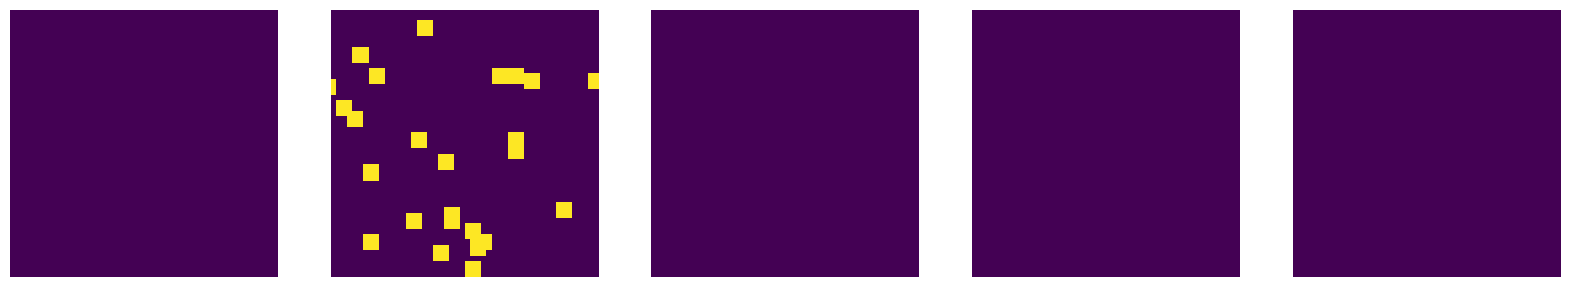

In [11]:
# Now lets try to solve this counting problem with simple Monte Carlo (sampling uniformly at random) as the previous example
n = 5
test = np.arange(N)

samples = choices(np.arange(N), k=n) # this will sample uniformly random n tiles with repetition

tiles = get_tiles_from_image(im, tile_size=50) # this will make easier the visualization

fig, ax = plt.subplots(1, n, figsize=(20,5*n))
for i, s_i in enumerate(samples):
    plt.subplot(1,n, i+1)
    plt.imshow(tiles[s_i])
    cur = tiles[s_i]
    #print(type(cur))
    #print(cur)
    plt.axis('off')
plt.show()

In [12]:
# As you can se above, because we are sampling uniformly at random most of the tiles don't contain any objects
f_s_i = [0, 0, 7, 0, 0]

# Now we calculate our estimate of the number of objects using simple MC
F_hat = N*np.mean(f_s_i) # See Equation for \hat{F}(S) above
print('Estimated number of objects: %d (true count: %d)'%(F_hat, F))

# And here we calculate the error
F = 200*3 # because we sample 200 samples from each of the normal distributions, the image in this example has 600 objects
Error = np.abs(F - F_hat)/F
print('Error rate: %.2f%%'%(Error*100.))

Estimated number of objects: 560 (true count: 10000)
Error rate: 6.67%


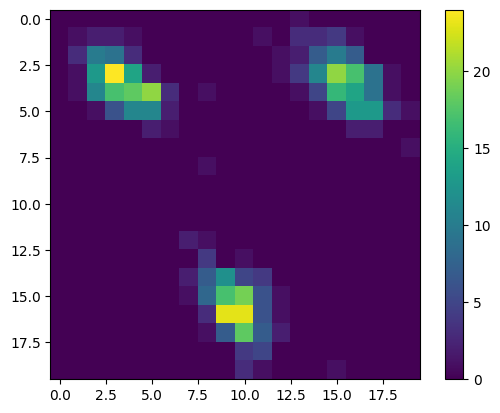

In [13]:
# As you can see the error is high because the mean count of the 5 tiles above is far from the mean count in the image.
# Now we will try to "direct" our sampling to be more correlated to the places where we actually have objects in the image. To do so we will use a proposal distribution.
# For the purposes of this tutorial let's assume we have an external covariate that we can use as proposal distribution.
# This covariate will gives us approximate counts per tile (we assume that the counts are somewhat correlated to the true counts but they are not completely accurate)
# For this example I will build the covariate by counting the connected components on each tile.
# As you can see some of the tiles are touching each other so the resulting count won't be completely accurate, but it will still be somewht correlated.

# Next I will calculate the number of connected components per tile to build the proposal distribution.
covariate = np.zeros((20, 20)) # recall we have 20x20 tiles (each tile of 50x50 pixels on an image of size 1000x1000)
for i, tile in enumerate(tiles):
  _, conn_comp = label(tile)
  covariate[i//20, i%20] = conn_comp

plt.imshow(covariate)
plt.colorbar()
plt.show()

In [14]:
# As you can see our covariate is correlated to the actual counts in the image (NOTE: the image below shows the number of objects per tile, according to the covariate)
# it is correlated but it is not completely accurate, we can check that if we count the total number of connected components in the image is not the same as the number of objects
# because some of the objects are touching each other (Nevertheless in this example the covariate is pretty good, usually that is not the case).

print('Total number of objects according to the covariate (# conn. components): %d'%label(im)[1])

# And here we calculate the error
Error = np.abs(F - label(im)[1])/F
print('Error rate: %.2f%%'%(Error*100.))

Total number of objects according to the covariate (# conn. components): 538
Error rate: 10.33%


## Estimating counts with DIScount

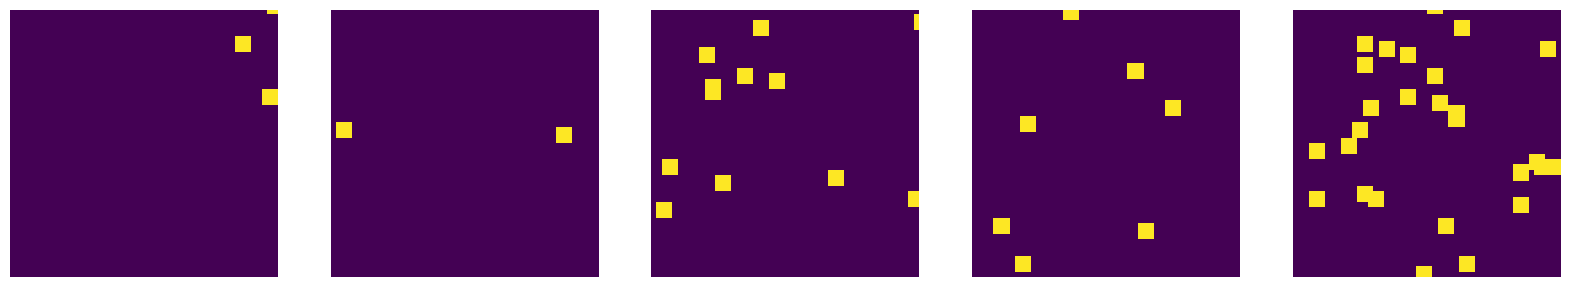

In [15]:
# Lets assume we have an square detector that we apply to each tile. We count the number of detections on each tile and we can get a count per tile like the image above.
# Lets assume our detector is pretty good but it gets confused when the objects are not clearly separate.
# So our detector counts g(s), where s is each tile is given by the "covariate" image above.

# To build the proposal distribution from the detector counts, first we need to normalize it so everything sum up to one.
q = covariate/np.sum(covariate)

# Now we sample from q (instead of sampling uniformly at random)
samples = list(np.random.choice(np.arange(N), n, p=q.flatten(), replace=True))

fig, ax = plt.subplots(1, n, figsize=(20,5*n))
for i, s_i in enumerate(samples):
    plt.subplot(1,n, i+1)
    plt.imshow(tiles[s_i])
    cur = tiles[s_i]
    plt.axis('off')
plt.show()

In [16]:
# As you can see, sampling from q gets us more likely tiles with higher counts
f_s_i = [4, 21, 4, 7, 8]

# Now we calculate our estimate of the number of objects using DISCount
# See Equation (1) in DISCount paper: https://www.gperezs.com/papers/pms_aaai2024.pdf
w_bar = 0
for i, s_i in enumerate(samples):
  w_bar += f_s_i[i]/covariate.flatten()[s_i] # w_bar(S) = \sum(f/g)
F_hat = np.sum(covariate)*w_bar/len(samples) # count estimate: F_hat = G(S)*1/n*w_bar(S)
print('Estimated number of objects: %d (true count: %d)'%(F_hat, F))

# Calculating confidence intervals
w_ci = 0
for i, s_i in enumerate(samples):
  w_ci += (np.sum(covariate)*f_s_i[i]/covariate.flatten()[s_i] - F_hat)**2
var_hat = w_ci/len(samples) # estimated variance
CI = 1.96*np.sqrt(var_hat/len(samples)) # 95% confidence intervals

# And here we calculate the error
Error = np.abs(F - F_hat)/F
print('Error rate: %.2f%%'%(Error*100.))
print('Estimate: %d \u00B1 %d'%(F_hat, CI))

Estimated number of objects: 1566 (true count: 600)
Error rate: 161.06%
Estimate: 1566 ± 1972


In [17]:
# Just by sampling 5 tiles we get an error of 2.2%, which is lower than 12.83% of the "detector" counts, and much lower than using simple MC.